In [2]:
from sklearn.cluster import KMeans

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df = pd.DataFrame(columns = ('x', 'y'))
df.loc[0] = [7, 1]
df.loc[1] = [2, 1]
df.loc[2] = [4, 2]
df.loc[3] = [9, 4]
df.loc[4] = [10, 5]
df.loc[5] = [10, 6]
df.loc[6] = [11, 5]
df.loc[7] = [11, 6]
df.loc[8] = [15, 3]
df.loc[9] = [15, 2]
df.loc[10] = [16, 6]
df.loc[11] = [16, 1]

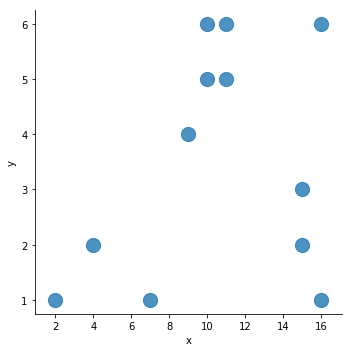

In [8]:
sns.lmplot('x', 'y', data = df, fit_reg = False, scatter_kws = {'s' : 200})

In [9]:
data_points = df.values
data_points

array([[7, 1],
       [2, 1],
       [4, 2],
       [9, 4],
       [10, 5],
       [10, 6],
       [11, 5],
       [11, 6],
       [15, 3],
       [15, 2],
       [16, 6],
       [16, 1]], dtype=object)

In [19]:
kmeans = KMeans(n_clusters = 3).fit(data_points)
kmeans.labels_

array([1, 1, 1, 0, 0, 0, 0, 0, 2, 2, 2, 2])

In [20]:
df['clu_id'] = kmeans.labels_
df

,x,y,clu_id
0,7,1,1
1,2,1,1
2,4,2,1
3,9,4,0
4,10,5,0
5,10,6,0
6,11,5,0
7,11,6,0
8,15,3,2
9,15,2,2


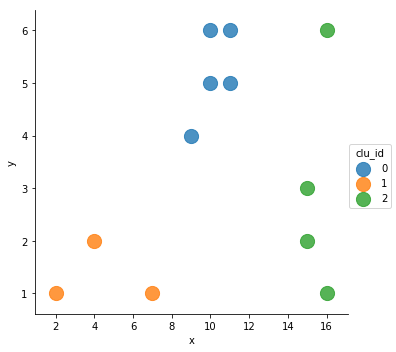

In [21]:
# visualization
sns.lmplot('x', 'y', data = df, fit_reg = False, scatter_kws = {'s' : 200}, hue = 'clu_id')

In [22]:
# 분류용 가상데이터 생성
# make_blobs() : 등방성 가우시안 정규분포
# n_samples : 표본수
# n_features : 독립변수의 수
# center : 클러스터의 수

from sklearn.datasets import make_blobs

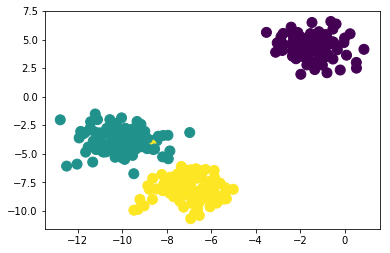

In [27]:
X, y = make_blobs(n_samples = 300, n_features = 2, centers = 3, random_state = 1)

plt.scatter(X[:, 0], X[:, 1], marker = 'o', c = y, s = 100)
plt.show()

In [30]:
feature, label = make_blobs(random_state = 1)
# feature

In [31]:
clu_mean = KMeans(n_clusters = 3)
clu_mean.fit(feature)

KMeans(n_clusters=3)

In [32]:
clu_mean.labels_

array([1, 0, 0, 0, 2, 2, 2, 0, 1, 1, 0, 0, 2, 1, 2, 2, 2, 1, 0, 0, 2, 0,
       2, 1, 0, 2, 2, 1, 1, 2, 1, 1, 2, 1, 0, 2, 0, 0, 0, 2, 2, 0, 1, 0,
       0, 2, 1, 1, 1, 1, 0, 2, 2, 2, 1, 2, 0, 0, 1, 1, 0, 2, 2, 0, 0, 2,
       1, 2, 1, 0, 0, 0, 2, 1, 1, 0, 2, 2, 1, 0, 1, 0, 0, 2, 1, 1, 1, 1,
       0, 1, 2, 1, 1, 0, 0, 2, 2, 1, 2, 1])

In [33]:
clu_mean.predict(feature)

array([1, 0, 0, 0, 2, 2, 2, 0, 1, 1, 0, 0, 2, 1, 2, 2, 2, 1, 0, 0, 2, 0,
       2, 1, 0, 2, 2, 1, 1, 2, 1, 1, 2, 1, 0, 2, 0, 0, 0, 2, 2, 0, 1, 0,
       0, 2, 1, 1, 1, 1, 0, 2, 2, 2, 1, 2, 0, 0, 1, 1, 0, 2, 2, 0, 0, 2,
       1, 2, 1, 0, 0, 0, 2, 1, 1, 0, 2, 2, 1, 0, 1, 0, 0, 2, 1, 1, 1, 1,
       0, 1, 2, 1, 1, 0, 0, 2, 2, 1, 2, 1])

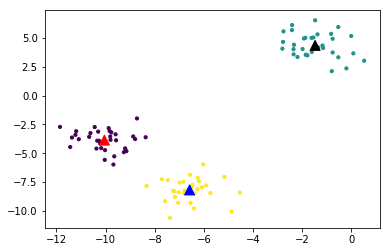

In [40]:
plt.scatter(feature[:, 0], feature[:, 1], c = clu_mean.labels_, marker = 'o', s = 10)
plt.scatter(clu_mean.cluster_centers_[:, 0], clu_mean.cluster_centers_[:, 1], c = ['r', 'k', 'b'], marker = '^', s = 100)
plt.show()

In [41]:
from sklearn.datasets import load_iris

In [47]:
iris = load_iris()

# 데이터프레임 변환
iris_df = pd.DataFrame(data = iris.data, columns = iris.feature_names)
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [54]:
# KMeans 객체 생성 및 군집화 수행
iris_kmeans = KMeans(n_clusters = 3, random_state = 0, init = 'k-means++', max_iter = 300) 
iris_kmeans.fit(iris_df)

KMeans(n_clusters=3, random_state=0)

In [55]:
iris_kmeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2])

In [56]:
iris_kmeans.predict(iris_df)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2])

In [58]:
# 포인트별 할당된 그룹을 열로 추가
iris_df['clu_id'] = iris_kmeans.labels_
iris_df['target'] = iris.target
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),clu_id,target
0,5.1,3.5,1.4,0.2,1,0
1,4.9,3.0,1.4,0.2,1,0
2,4.7,3.2,1.3,0.2,1,0
3,4.6,3.1,1.5,0.2,1,0
4,5.0,3.6,1.4,0.2,1,0


In [63]:
# 그룹(target, clu_id)을 통한 sepal_length의 빈도를 확인
iris_df.groupby(['target', 'clu_id'])[['sepal length (cm)']].count()

sepal length (cm)
target clu_id                   
0      1                      50
1      0                       2
       2                      48
2      0                      36
       2                      14

In [86]:
# 구현 시각화
# 2차원 평면에 데이터 포인트별로 군집화된 결과를 시각화
# 차원 축소
# 주성분 분석

from sklearn.decomposition import PCA

iris_pca = PCA(n_components = 2)
iris_pca_transform = iris_pca.fit_transform(iris.data)
# iris_pca_transform

iris_df['pca_x'] = iris_pca_transform[:, 0]
iris_df['pca_y'] = iris_pca_transform[:, 1]
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),clu_id,target,pca_x,pca_y
0,5.1,3.5,1.4,0.2,1,0,-2.684126,0.319397
1,4.9,3.0,1.4,0.2,1,0,-2.714142,-0.177001
2,4.7,3.2,1.3,0.2,1,0,-2.888991,-0.144949
3,4.6,3.1,1.5,0.2,1,0,-2.745343,-0.318299
4,5.0,3.6,1.4,0.2,1,0,-2.728717,0.326755


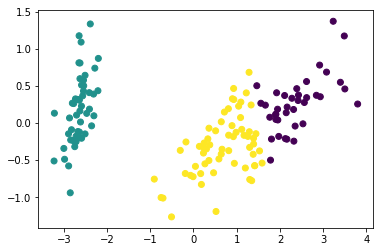

In [87]:
plt.scatter(x = iris_df['pca_x'], y = iris_df['pca_y'], c = iris_df['clu_id'])
plt.show()

,0,1,2,3
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),clu_id,target,pca_x,pca_y,sts_pca_x,sts_pca_y
0,5.1,3.5,1.4,0.2,1,0,-2.684126,0.319397,-2.264703,0.480027
1,4.9,3.0,1.4,0.2,1,0,-2.714142,-0.177001,-2.080961,-0.674134
2,4.7,3.2,1.3,0.2,1,0,-2.888991,-0.144949,-2.364229,-0.341908
3,4.6,3.1,1.5,0.2,1,0,-2.745343,-0.318299,-2.299384,-0.597395
4,5.0,3.6,1.4,0.2,1,0,-2.728717,0.326755,-2.389842,0.646835


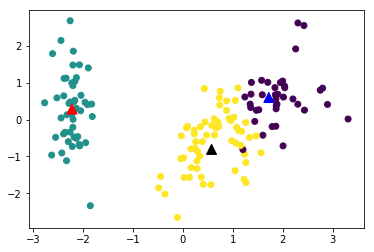

In [99]:
# 표준화를 통한 차원축소 및 시각화

# 타겟을 제외한 feature만 추출하여 표준화 작업 진행
# 주성분 분석을 하기 전 데이터 표준화
std_scaler = StandardScaler()
df_iris = std_scaler.fit_transform(iris_df.iloc[:, :4])
pca_iris_scaler_df = pd.DataFrame(df_iris)
display(pca_iris_scaler_df.head())

iris_pca = PCA(n_components = 2)
iris_pca_transform = iris_pca.fit_transform(pca_iris_scaler_df)
iris_df['sts_pca_x'] = iris_pca_transform[:, 0]
iris_df['sts_pca_y'] = iris_pca_transform[:, 1]
display(iris_df.head())

# cluster center point 마크
iris_clu_mean = KMeans(n_clusters = 3)
iris_clu_mean.fit(iris_df.iloc[:, -2:])
plt.scatter(x = iris_df['sts_pca_x'], y = iris_df['sts_pca_y'], c = iris_df['clu_id'])
plt.scatter(iris_clu_mean.cluster_centers_[:, 0], iris_clu_mean.cluster_centers_[:, 1], c = ['r', 'k', 'b'], marker = '^', s = 100)

plt.show()

In [ ]:
# PCA (차원축소)
# Principal component Analysis
# 데이터의 feature를 압축 (테이블 매트릭스의 차원을 낮추는 작업)

# ex) 온도, 습도, 강수량, 미세먼지, 풍속, 태풍여부 ...... 교통량, 유동인구
# 습도와 강수량은 양의 상관관계로 이 둘은 밀접한 연관성이 있다고 볼 수 있다.
# 연관성이 있는 feature들을 하나로 합쳐주는 작업 -> 주성분 분석(PCA)

In [64]:
pca_iris_df = pd.DataFrame(data = iris.data, columns = iris.feature_names)
pca_iris_df['target'] = iris.target
pca_iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


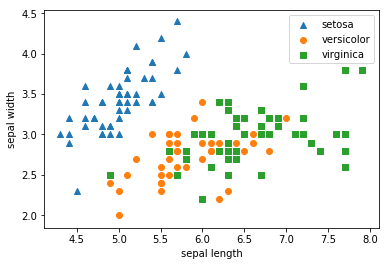

In [82]:
markers = ['^', 'o', 's']
for i, marker in enumerate(markers) :
    # print(i, marker)
    
    x_data_point = pca_iris_df[pca_iris_df['target'] == i]['sepal length (cm)']
    y_data_point = pca_iris_df[pca_iris_df['target'] == i]['sepal width (cm)']
    # print(x_data_point, y_data_point)
    
    plt.scatter(x_data_point, y_data_point, marker = marker, label = iris.target_names[i])

plt.legend()
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.show()

In [75]:
# 컬럼에 대한 데이터 표준화
from sklearn.preprocessing import StandardScaler

# 타겟을 제외한 feature만 추출하여 표준화 작업 진행
# 주성분 분석을 하기 전 데이터 표준화
scaler = StandardScaler().fit_transform(pca_iris_df.iloc[:, :4])

pca_iris_scaler_df = pd.DataFrame(scaler)
pca_iris_scaler_df.head()

,0,1,2,3
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444


In [78]:
# 주성분 분석
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)
iris_pca = pca.fit(scaler).transform(scaler)
# iris_pca

iris_pca_df = pd.DataFrame(iris_pca, columns = ['pca01', 'pca02'])
iris_pca_df['target'] = iris.target
display(iris_pca_df.head())
iris_pca_df.info()

,pca01,pca02,target
0,-2.264703,0.480027,0
1,-2.080961,-0.674134,0
2,-2.364229,-0.341908,0
3,-2.299384,-0.597395,0
4,-2.389842,0.646835,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 3 columns):
pca01     150 non-null float64
pca02     150 non-null float64
target    150 non-null int32
dtypes: float64(2), int32(1)
memory usage: 3.0 KB


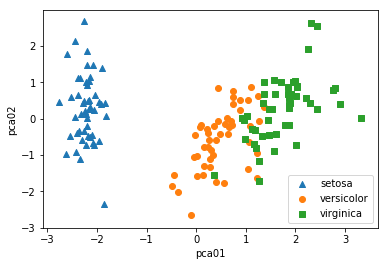

In [83]:
# 각 타겟별 데이터 분포 확인
markers = ['^', 'o', 's']

for i, marker in enumerate(markers) :
    # print(i, marker)
    
    x_data_point = iris_pca_df[iris_pca_df['target'] == i]['pca01']
    y_data_point = iris_pca_df[iris_pca_df['target'] == i]['pca02']
    # print(x_data_point, y_data_point)
    
    plt.scatter(x_data_point, y_data_point, marker = marker, label = iris.target_names[i])

plt.legend()
plt.xlabel('pca01')
plt.ylabel('pca02')
plt.show()